# Bootstrap Sampling

This notebook will cover the basic idea of bootstrap sampling. I was inspired by this [blog post](https://www.fantasydatapros.com/betting/blog/nfl/1) which covered bootstrap sampling and the poisson distribution.

I will use [George Pickens](https://www.espn.com/nfl/player/gamelog/_/id/4426354/george-pickens) who is a wide reciever for the Pittsburgh Steelers. I will manually copy the receiving yards for the current season. The data will be used to determine if it is appropiate to take the over or under for his next game.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Sample receiving yards
data_array = np.array([85, 29, 57, 113, 26, 53, 111, 74, 91, 89])
fanduel_ou = 57.5
fanduel_odd = -114
sample_size = len(data_array)
mean_value = data_array.mean()
std_value = data_array.std()


print(f"Sample Size: {sample_size}")
print(f"Mean Receiving Yards: {mean_value}")
print(f"Standard Deviation Receiving Yards: {std_value}")

Sample Size: 10
Mean Receiving Yards: 72.8
Standard Deviation Receiving Yards: 29.27387914165118


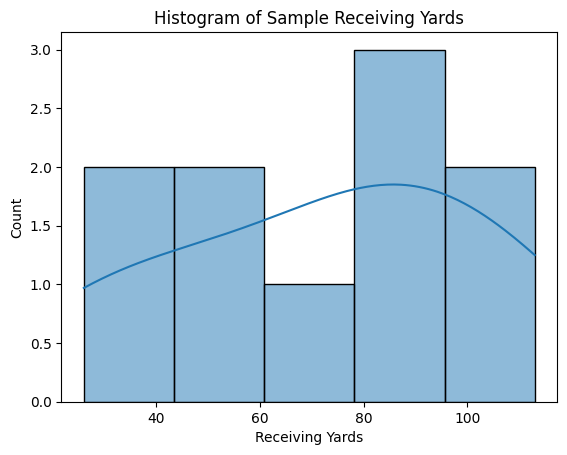

In [3]:
# Histogram of the sample receiving yards
sns.histplot(data=data_array, kde=True)
plt.title("Histogram of Sample Receiving Yards")
plt.xlabel("Receiving Yards")
plt.show()

In [4]:
# Create a function to perform bootstrap sampling
def bootstrap_sampling(samples: list, iter: int):
    bootstrap_u = np.zeros(iter)

    for i in range(iter):
        bootstrap_sample = np.random.choice(a=samples, size=len(samples), replace=True)
        bootstrap_u[i] = bootstrap_sample.mean()    

    return bootstrap_u

bootstrap_array = bootstrap_sampling(samples=data_array, iter=5000)
bootstrap_array

array([81.3, 67.6, 77.3, ..., 84.3, 77.9, 81.4])

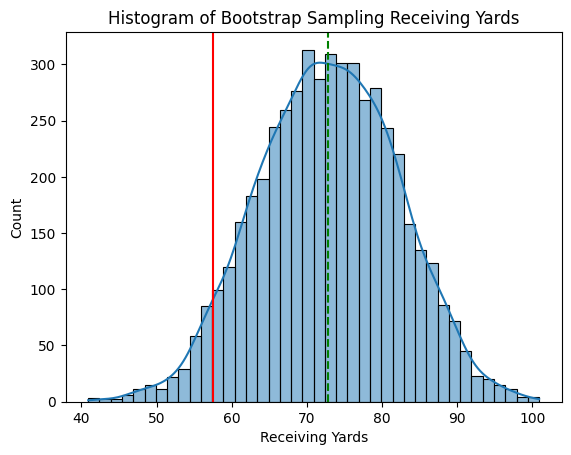

In [5]:
# Plot the histogram of the bootstrap sampling of receiving yards
sns.histplot(data=bootstrap_array, kde=True)
plt.axvline(x=mean_value, c="g", linestyle="--")
plt.axvline(x=fanduel_ou, c="r")
plt.title("Histogram of Bootstrap Sampling Receiving Yards")
plt.xlabel("Receiving Yards")
plt.show()

In [6]:
# Calculate the 95% confidence interval of the true mean (Sample)
sample_mean = mean_value
z = 1.96
s = std_value
n = np.sqrt(sample_size)

lower_bound = sample_mean - (z*(s/n))
upper_bound = sample_mean + (z*(s/n))

print("95% Confidence Interval (Sample)")
print(f"Lower Bound: {round(lower_bound, 3)}")
print(f"Upper Bound: {round(upper_bound, 3)}")

95% Confidence Interval (Sample)
Lower Bound: 54.656
Upper Bound: 90.944


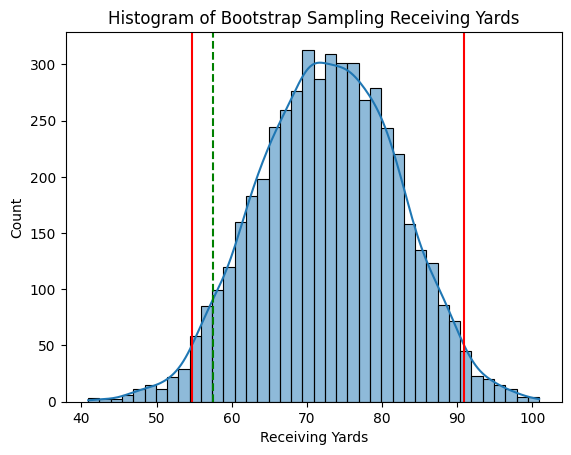

In [7]:
# Compare the line with the CI of the mean
sns.histplot(data=bootstrap_array, kde=True)
plt.axvline(x=fanduel_ou, c="g", linestyle="--")
plt.axvline(x=lower_bound, c="r")
plt.axvline(x=upper_bound, c="r")
plt.title("Histogram of Bootstrap Sampling Receiving Yards")
plt.xlabel("Receiving Yards")
plt.show()